# Прихотливая (Fancy) индексация

In [5]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Доступ к элементам с заданными индексами:

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

Альтернатива - это список или массив индексов:

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

Размерность результата - это размерность массива индексов:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy индексация работает и в случае многомерных массивов:

In [10]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Первый массив - это индексы строк, второй - индексы колонок:

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Правила транслирования работают и для индексации:

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Комбинированная индексация

In [11]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Комбинируем обычный и fancy индекс:

In [12]:
X[2, [2, 0, 1]]

array([10,  8,  9])

Комбинируем срез и fancy индекс:

In [13]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Мы можем комбинировать fancy индекс и маску: 

In [14]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Частое применение - выборка случайных подмножеств из матриц

In [15]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

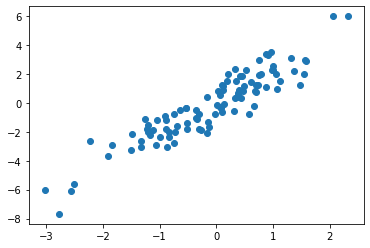

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]);

Возьмем 20 случайных точек:

In [18]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([31, 23, 38, 49, 48, 19, 91, 13, 51, 30,  3, 22, 55, 72, 76, 34, 77,
        6, 61, 75])

In [21]:
selection = X[indices]
selection.shape

(20, 2)

Посмотрим какие точки были выбраны:

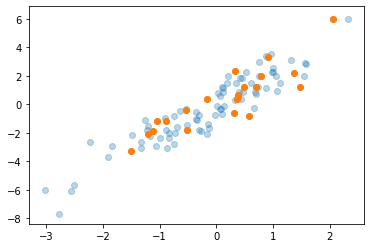

In [39]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1]);

Такой подход используется разделения выборки на обучающую и проверочную

## Изменение значений при Fancy индексации

In [40]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


А можем и уменьшить:

In [41]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Но результат может быть нетривиальным:

In [43]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Куда пропала четверка? Первое присваивание ``x[0] = 4``, Второе ``x[0] = 6``.

In [44]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

Исходное значение запоминается
Елси необходимо другое поведение, то используйте at():

In [45]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

## Пример: Привязывание данных

Давайте создадим гистограмму вручную:

In [52]:
np.random.seed(1)
x = np.random.randn(100)

bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)
counts

array([ 0.,  0.,  0.,  0.,  0.,  0.,  3.,  2.,  9., 24., 23., 17., 14.,
        6.,  2.,  0.,  0.,  0.,  0.,  0.])

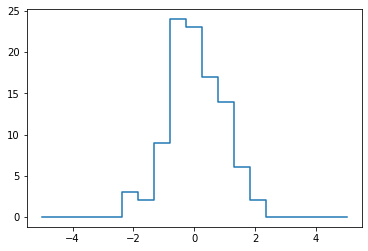

In [56]:
plt.plot(bins, counts, drawstyle='steps');

In [57]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
25.8 µs ± 940 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
15.6 µs ± 411 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
